In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [4]:
# Que aeropuertos recibe más pasajeros. cols = arr_port y pax.

In [8]:
#entiende sin descomprimir.

data = pd.read_csv("bookings.csv.bz2",sep='^',nrows=10000)

In [10]:
data2 = data[['arr_port', 'pax']]

In [11]:
data2.head(3)

,arr_port,pax
0,LHR,-1
1,CLT,1
2,CLT,1


In [13]:
data3 = data2.groupby('arr_port').sum()

In [14]:
data3

,pax
arr_port,
AAL,0
ABQ,12
ABV,2
ABZ,-6
ACC,4
ADD,7
ADZ,2
AEP,7
AER,1


In [19]:
data3.sort('pax', ascending=0).head(10)

,pax
arr_port,
HKG,112
LGA,95
ORD,94
JFK,92
LAX,91
SFO,91
MCO,90
DCA,82
DEN,79


In [20]:
# Para todo el documento.

In [21]:
data4 = pd.read_csv("bookings.csv.bz2",sep='^',usecols=['arr_port', 'pax'])

In [24]:
data5 = data4.groupby('arr_port').sum()

In [43]:
datafinal2 = data5.sort('pax', ascending=0).head(10)

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

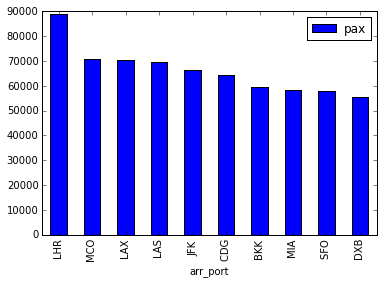

In [32]:
datafinal2.plot(kind="bar")

In [33]:
datafinal2.__class__

pandas.core.frame.DataFrame

# Para ficheros grandes

In [34]:
# Suponemos que ni las dos columnas entran en memoria.

In [57]:
# uso de chunk
# El 1e5 son 10.000 filas.
data11 = pd.read_csv("bookings.csv.bz2",sep='^', chunksize=1e6)

In [55]:
datafinal = pd.DataFrame()

In [56]:
for chunk in data11:
    trozo = chunk.groupby('arr_port').sum('pax')
    trozo = trozo.sort('pax', ascending=0).head(10)
    pd.concat([datafinal, trozo], axis=0, ignore_index=False)

KeyboardInterrupt: 

In [ ]:
# Solución para chunk 1
lista = []
for chunk in data11:
    s = chunk.groupby('arr_port').pax.sum()
    lista.append(s)
    
todoslosDF = pd.concat(lista)

sTodos= todoslosDF.groupby('arr_port').pax.sum()
sTodos.reset_index().sort('pax', ascending=False)

In [60]:
# Solución para chunk 2

c = pd.DataFrame([])
hePasadoYaPorChunk1 = False

for chunk in data11:
    s = chunk.dropna().groupby('arr_port').pax.sum().reset_index()
    if hePasadoYaPorChunk1:
        c = pd.concat([s,todoslosDF])
    else:
        c = s
        hePasadoYaPorChunk1 = True
    todoslosDF = c.groupby('arr_port').pax.sum().reset_index()
    
todoslosDF.sort('pax', ascending=False).head()

,arr_port,pax
1088,LHR,71047
1190,MCO,56744
1050,LAX,56424
1047,LAS,55704
886,JFK,53016


In [61]:
datafinal2

,pax
arr_port,
LHR,88809
MCO,70930
LAX,70530
LAS,69630
JFK,66270
CDG,64490
BKK,59460
MIA,58150
SFO,58000


In [87]:
# Uso de GeoBase
from GeoBases import GeoBase
g = GeoBase(data='ori_por', verbose=False)

In [88]:
g.get('MUC')['name']

'Munich International Airport'

In [89]:
# DataFrame con columna adicional con el nombre aeropuerto y codigo.

In [90]:
names = []
for x in todoslosDF.arr_port:
    names.append(g.get(x.strip())['name'])

KeyError: 'Thing not found: SG'

In [70]:
def getname(aeropuerto):
    return g.get(aeropuerto.strip())['country_name']

In [82]:
todoslosDF.arr_port.apply(getname)

KeyError: 'Thing not found: SG'

In [83]:
cities = todoslosDF.arr_port.apply(lambda a: g.get(a.strip())['city_name_ascii'])
datafinal2['cities'] = cities

KeyError: 'Thing not found: SG'

In [79]:
# GioBases se puede usar con Tableau.

In [80]:
todoslosDF

,arr_port,pax
0,AAB,24
1,AAE,648
2,AAL,648
3,AAN,16
4,AAQ,1320
5,AAR,400
6,ABA,72
7,ABB,32
8,ABE,704
9,ABI,120
